라이브러리

In [2]:
import numpy as np
import matplotlib.pylab as plt

1. 기울기 (Gradient)
    - 여러 변수의 편미분을 벡터로 모은 것을 기울기(Gradient) 라고 한다.
        - 기울기는 함수의 가장 가파르게 증가하는 방향을 가리킨다.
        - 기울기의 반대 방향으로 이동하면 함수 값을 줄일 수 있다. (최솟값 찾기)

- 1.1 수치적으로 기울기 구하기

In [3]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad


- 1.2 함수 예시

In [4]:
def function_2(x):
    return x[0]**2 + x[1]**2


- 1.3 기울기 계산 예시

In [5]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [6. 8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [0. 4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [6. 0.]

[6. 8.]
[0. 4.]
[6. 0.]


각각의 좌표에 대해 $\frac{\partial f}{\partial x_0},\quad \frac{\partial f}{\partial x_1}$ 값을 구할 수 있다.

2. 경사하강법 (Gradient Descent)
    - 기울기를 사용하여 함수를 최솟값 방향으로 조금씩 이동시키는 방법이다.



- 2.1 경사하강법 알고리즘
    - init_x : 초기값
    - lr (learning rate) : 학습률 (한 번 이동하는 거리)
    - step_num : 반복 횟수

In [7]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


- 2.2 경사하강법으로 최솟값 찾기

In [8]:
# 초기값
init_x = np.array([-3.0, 4.0])

# 적절한 학습률
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ 약 0, 약 0 ]


[-6.11110793e-10  8.14814391e-10]


    - 결과: 거의 (0, 0) 근처로 수렴한다. (최솟값)



3. 학습률(learning rate)에 따른 차이


- 3.1 학습률이 너무 큰 경우

In [9]:
init_x = np.array([-3.0, 4.0])
x, _ = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # 값이 터져서 발산함


[-2.58983747e+13 -1.29524862e+12]


    - 학습률이 너무 작으면 거의 움직이지 않고 학습이 매우 느려진다.

4. 경로 시각화

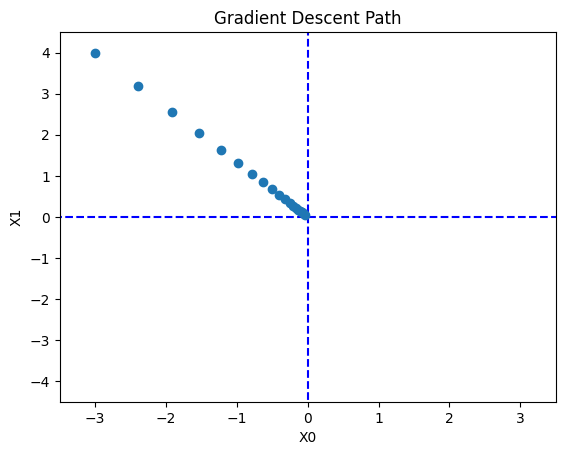

In [ ]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

# x축 y축 기준선
plt.plot([-5, 5], [0, 0], '--b')  # x축
plt.plot([0, 0], [-5, 5], '--b')  # y축

# 이동 경로
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Gradient Descent Path")
plt.show()


    - 점들이 (0,0) 방향으로 모여가면서 최솟값을 찾아가는 모습을 볼 수 있다.

